Este código contiene la solución al problema **11** de la guía 3 de astrometría:
![](11.png)


El método de máxima verosimilitud (traducido maximum likelihood) trata de $\color{orange}{\text{maximizar}}$ la probabilidad total, en el sentido de que propone un modelo y busca los parámetros tales que expliquen mejor los datos observados.

Matemáticamente el likelihood a maximizar es el producto de las probabilidades de cada variable aleatoria (dato) y a esa forma funcional de las probabilidades individuales se las obtiene por la "probability mass fuction" para Poisson o Gauss dado sea el caso

Likelihood para **un** dato en Poisson:
![](fpPoisson.png)

Logaritmo de la likelihood total:
![](maxLikP.png)

In [3]:
%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import poisson
# Estilo de gráficos
plt.style.use('dark_background');

In [4]:
plt.style.use('dark_background')

In [5]:
N = 1000
mu_0 = 4 # Arbitrario
X = poisson.rvs(size=N, mu=mu_0)
ERR = 1 # Arbitrario

In [6]:
def Neg_Log_LK(mu):
    """ Devuelve el valor de -log(Likelihood), está asociada al arreglo X. No lo pongo como 
    parámetro porque así es el formato que piden los algoritmos genéticos
    
    Parameters
    ----------
    mu : .float, mayor a cero
        Tasa Poisson
        
    Returns
    -------
    LP : .float
        "Menos el logaritmo de la likelihood total" Poisson
        
    """
    import numpy as np
    from math import factorial
    # Por las dudas transformo a arreglos numpy 
    N = len(X)
    # Defino los tres términos por separado, para que no se vea tan complejo
    T1 = N*mu
    T2 = []
    T3 = []
    ij = 0
    while ij<len(X)-1:
        T2.append( np.log(factorial(X[ij])) )
        T3.append( np.log(mu)*X[ij] ) 
        ij = ij + 1
    # Junto todo en una expresión
    LK = T1 + np.sum(T2) - np.sum(T3)
    return LK

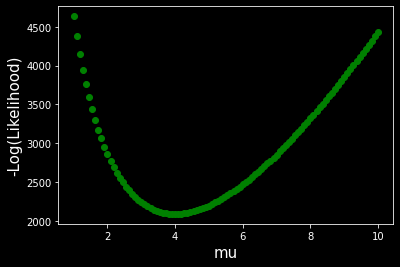

In [7]:
# Veo que funcione a mano
LK = Neg_Log_LK # Para que sea más entendible
# Defino puntos
Puntos = np.linspace(1,10, 100)
Val_est = [] # valor del estimador (valor de -Log(likelihood))
ij = 0
while ij<len(Puntos):
    Val_est.append(LK(Puntos[ij]))
    ij = ij + 1
# Gráfico simple
plt.scatter(Puntos, Val_est, color='green')
plt.xlabel('mu', fontsize=15)
plt.ylabel('-Log(Likelihood)', fontsize=15);

Funciona, ahora utilizo un minimizador para encontrar "mu"

In [8]:
# Bounds para la exploración con algoritmo genético:
rmu = (1, 10) # Rango de valores de "mu"                      

In [9]:
%%time
import scipy.optimize as optimize
bounds = rmu
resAG = optimize.differential_evolution(Neg_Log_LK, bounds, strategy='best1bin', 
                                           maxiter=100, popsize=100,tol=0.01, 
                                           mutation=(0.5, 1), recombination=0.7, 
                                           seed=None, callback=None, disp=False, 
                                           polish=True, init='latinhypercube', atol=0)

IndexError: tuple index out of range

NO entiendo por qué no andan los AG